In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import torch

from torch.utils.data import DataLoader
from pathlib import Path

import utils
import cvae

# directorys with data and to store training checkpoints and logs
DATA_DIR = Path.cwd().parent.parent / "DevelopmentData"
CHECKPOINTS_DIR = Path.cwd() / "cvae_model_weights" / f"cvae_model_new_loss.pth"

c:\Users\20212077\.conda\envs\teamchallenge\Lib\site-packages\sigpy\config.py:27: UserWarning: Importing cupy.cuda.cudnn failed. For more details, see the error stack below:
No module named 'cupyx.cudnn'
  warnings.warn(


Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


c:\Users\20212077\.conda\envs\teamchallenge\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\20212077\.conda\envs\teamchallenge\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\20212077\.conda\envs\teamchallenge\Lib\site-packages\lpips\weights\v0.1\vgg.pth


In [2]:
# data settings 
IMAGE_SIZE = [64, 64]
BATCH_SIZE = 1290
Z_DIM = 256

# find patient folders in training directory
# excluding hidden folders (start with .)
patients = [
    path
    for path in DATA_DIR.glob("*")
    if not any(part.startswith(".") for part in path.parts)
]

# load training data and create DataLoader with batching and shuffling
dataset = utils.ProstateMRDataset(patients, IMAGE_SIZE)
dataloader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    drop_last=False,
    pin_memory=True
)

# Obtain all images in a tensor
total_prostate, total_segment = next(iter(dataloader))

# Load the trained model weights
cvae_model = cvae.CVAE()
cvae_model.load_state_dict(torch.load(CHECKPOINTS_DIR))
cvae_model.eval();

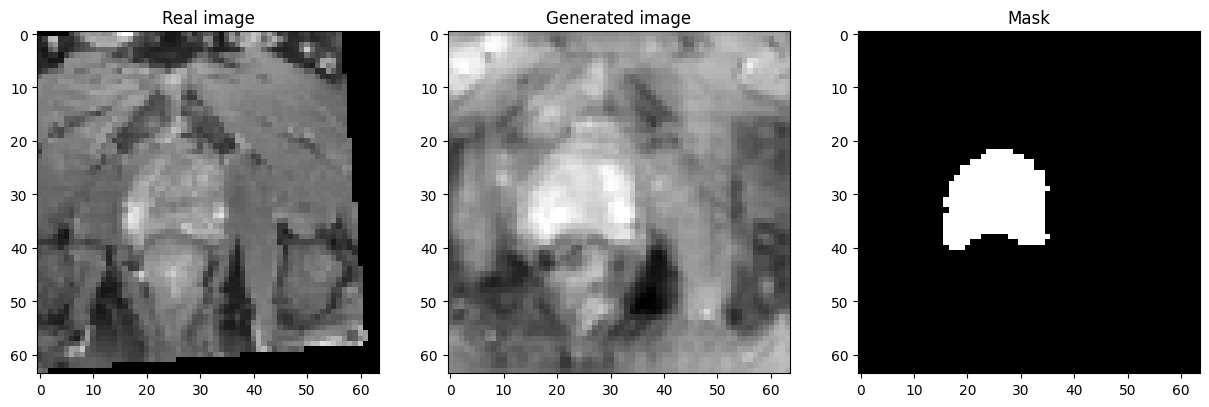

In [18]:
# Select a random image mask pair
random_idx = random.randint(0, BATCH_SIZE - 1)
mr_prostate = total_prostate[random_idx]
mask = total_segment[random_idx].to(mr_prostate.dtype).unsqueeze(0)

with torch.no_grad():
    noise = torch.randn(1, Z_DIM)
    image_sample = cvae_model.generator(noise, mask)

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(mr_prostate[0], cmap="gray")
    ax[0].set_title("Real image")
    ax[1].imshow(image_sample[0][0], cmap="gray")
    ax[1].set_title("Generated image")
    ax[2].imshow(mask[0][0], cmap="gray")
    ax[2].set_title("Mask")